In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout ,BatchNormalization
from tensorflow.keras import Model, Sequential
from tensorflow.keras import regularizers

2023-07-04 06:03:42.272691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-07-04 06:03:42.272725: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64,3)))
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))

2023-07-04 06:03:47.164349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-07-04 06:03:47.164383: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-04 06:03:47.164609: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-07-04 06:03:47.165891: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# model.add(Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))

In [4]:
# model.add(Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2 ,padding='same'))

In [99]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64,3)))
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))
# model.add(Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))
# model.add(Conv2D(filters = 128, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2 ,padding='same'))
# #model.add(Flatten())
# #model.add(BatchNormalization())
# ############
# model.add(Flatten())
# ###
# model.add(Dense(units=526, activation='relu'))
# model.add(Dropout(0.5))
# #model.add(BatchNormalization())
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.5))
# #model.add(BatchNormalization())
# model.add(Dense(units=29, activation='relu'))
# model.add(Dropout(0.5))
# #model.add(BatchNormalization())
# model.add(Dense(units = 29, activation='softmax'))

# model.summary()







from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
input_shape = (64, 64, 3)
num_classes = 29

inputs = Input(shape=input_shape)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

x = Flatten()(x)
x = Dense(units=526, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(units=29, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(units=num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                        

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)

valid_generator = datagen.flow_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    subset="validation",
    target_size = (64, 64),
    shuffle="true"
)

train_generator = datagen.flow_from_directory(
    'asl_alphabet_train/asl_alphabet_train',
    subset="training",
    target_size = (64, 64),
    shuffle="true"
)

Found 17400 images belonging to 29 classes.
Found 69600 images belonging to 29 classes.


In [101]:
from tensorflow.keras.optimizers import Adadelta

model.compile(
    optimizer=Adadelta(learning_rate= 0.1),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [114]:
history=model.fit(
    train_generator,
    epochs = 50,
    verbose=1,
    validation_data=valid_generator
)

Epoch 1/50
2175/2175 [==============================] - 235s 108ms/step - loss: 2.9941 - accuracy: 0.1197 - val_loss: 2.6258 - val_accuracy: 0.2319
Epoch 2/50
2175/2175 [==============================] - 236s 109ms/step - loss: 2.5267 - accuracy: 0.2202 - val_loss: 2.1279 - val_accuracy: 0.3793
Epoch 3/50
2175/2175 [==============================] - 238s 109ms/step - loss: 2.0789 - accuracy: 0.3293 - val_loss: 1.7519 - val_accuracy: 0.4961
Epoch 4/50
2175/2175 [==============================] - 240s 110ms/step - loss: 1.7264 - accuracy: 0.4216 - val_loss: 1.4203 - val_accuracy: 0.5563
Epoch 5/50
2175/2175 [==============================] - 244s 112ms/step - loss: 1.4448 - accuracy: 0.5085 - val_loss: 1.1938 - val_accuracy: 0.6016
Epoch 6/50
2175/2175 [==============================] - 237s 109ms/step - loss: 1.2263 - accuracy: 0.5759 - val_loss: 1.0134 - val_accuracy: 0.6891
Epoch 7/50
2175/2175 [==============================] - 229s 105ms/step - loss: 1.0674 - accuracy: 0.6287 - val_

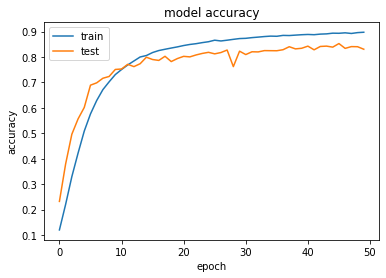

In [115]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

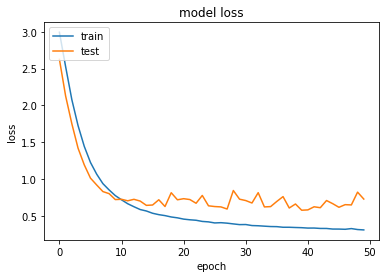

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

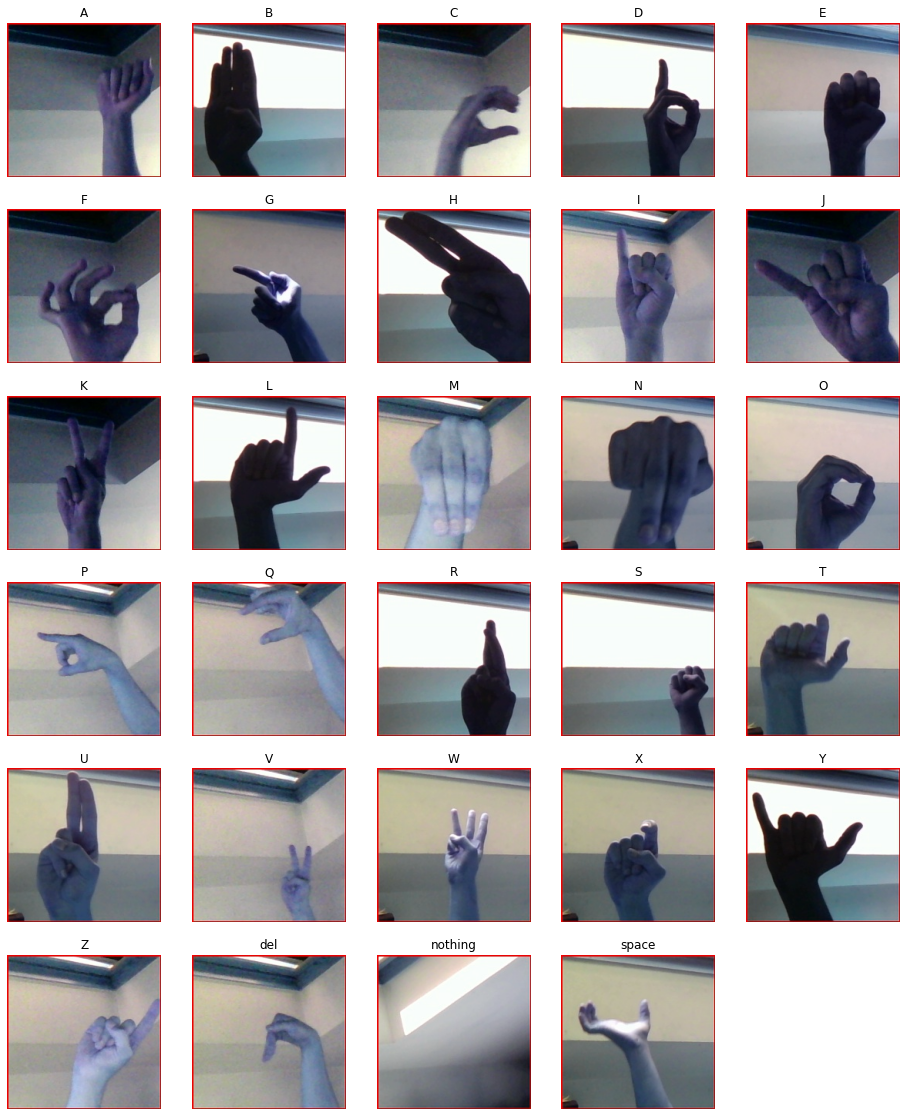

In [117]:
from glob import glob
import numpy as np
import random
import cv2

TRAIN_DIR = 'asl_alphabet_train/asl_alphabet_train'

CLASSES = [folder[len(TRAIN_DIR) + 1:] for folder in glob(TRAIN_DIR + '/*')]
CLASSES.sort()

cols = 5
rows = int(np.ceil(len(CLASSES) / cols))
fig = plt.figure(figsize = (16, 20))

for i in range(len(CLASSES)):
  cls = CLASSES[i];
  img_path = TRAIN_DIR + '/' + cls + '/**'
  path_contents = glob(img_path)

  imgs = random.sample(path_contents, 1)
  sp  =  plt.subplot(rows, cols, i+1)
  plt.imshow(cv2.imread(imgs[0]))
  plt.title(cls)
  sp.axis('off')
plt.show()

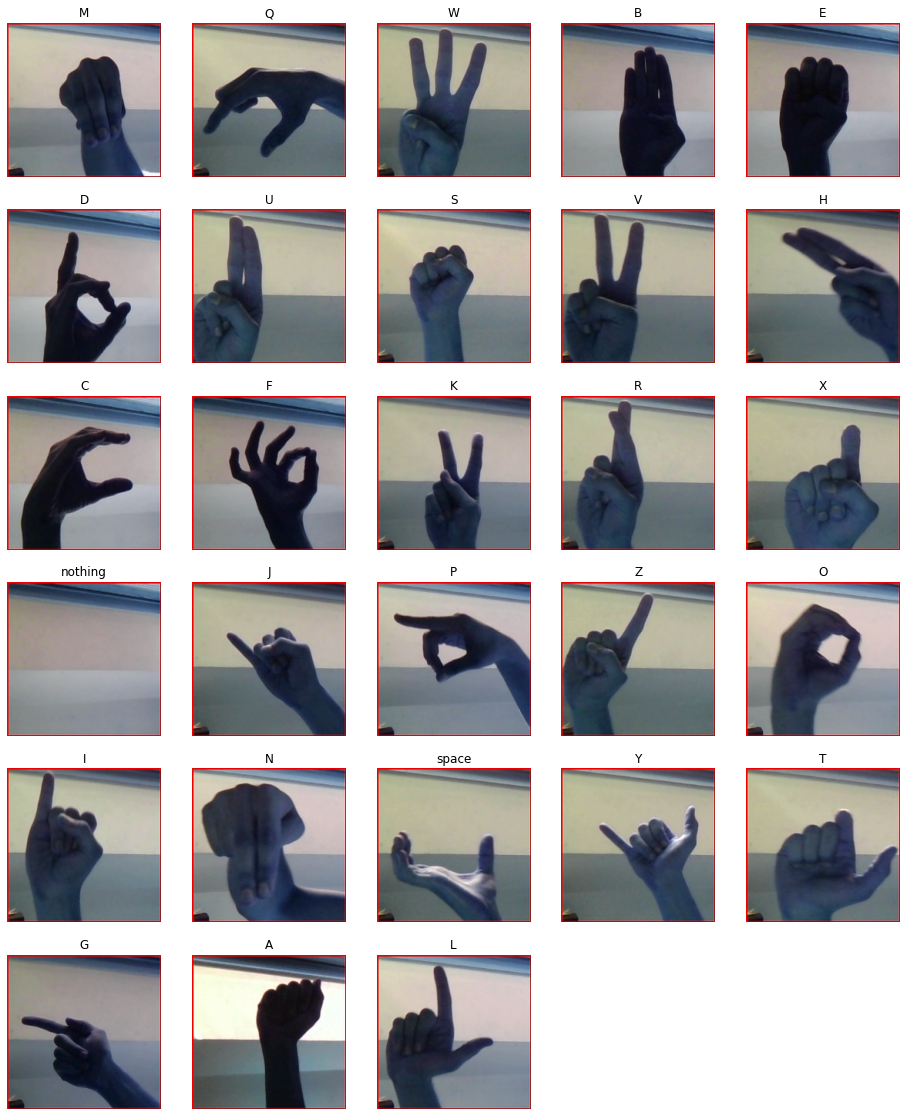

In [118]:
import tensorflow as tf

TEST_DIR = 'asl_alphabet_test/asl_alphabet_test'
test_set = np.array(glob(TEST_DIR + '/*'))

cols = 5
rows = int(np.ceil(len(test_set) / cols))
fig = plt.figure(figsize = (16, 20))

for i in range(len(test_set)):
  sp = plt.subplot(rows, cols, i + 1)
  img = cv2.imread(test_set[i])
  plt.imshow(img)

  img = tf.keras.preprocessing.image.load_img(test_set[i], target_size=(64,64))
  img_array = tf.keras.preprocessing.image.img_to_array(img)/255
  img_array = np.expand_dims(img_array, axis = 0)
  predictions = model.predict(img_array)
  PREDICTED_CLASS = np.argmax(predictions, axis = 1)
  PREDICTED_CLASS = CLASSES[PREDICTED_CLASS[0]]
  plt.title(PREDICTED_CLASS)
  sp.axis('off')
plt.show()

In [119]:
model.save('asl_.h5')

In [120]:
new_model = tf.keras.models.load_model('asl_.h5')


In [121]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                        

In [122]:
valid_generator

In [123]:
from tensorflow_model_optimization.quantization.keras import vitis_quantize

In [124]:
quantizer = vitis_quantize.VitisQuantizer(new_model)
quantized_model = quantizer.quantize_model(calib_dataset =valid_generator, weight_bit=8, activation_bit=8)

quantized_model.compile(loss='categorical_crossentropy', metrics=["accuracy"])

score = quantized_model.evaluate(valid_generator, verbose=0, batch_size=1)
print(score)
print('last')
quantized_model.save('asl_quant.h5')

[VAI INFO] Update activation_bit: 8
[VAI INFO] Update weight_bit: 8
[VAI INFO] Start CrossLayerEqualization...
10/10 [==============================] - 2s 188ms/step
[VAI INFO] CrossLayerEqualization Done.
[VAI INFO] Start Quantize Calibration...
544/544 [==============================] - 88s 156ms/step
[VAI INFO] Quantize Calibration Done.
[VAI INFO] Start Post-Quant Model Refinement...
[VAI INFO] Start Quantize Position Ajustment...
[VAI INFO] Quantize Position Ajustment Done.
[VAI INFO] Post-Quant Model Refninement Done.
[VAI INFO] Start Model Finalization...
[VAI INFO] Model Finalization Done.
[VAI INFO] Quantization Finished.
[0.7555349469184875, 0.8018965721130371]
last
